<a href="https://colab.research.google.com/github/ruebot/notebooks/blob/main/yfile_indigenous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```scala
val data = "/mnt/vol1/data_sets/indigenous_framework/yfile/web-pages.csv"

val df = spark.read.option("timestampFormat", "yyyy/MM/dd HH:mm:ss ZZ").format("csv").option("multiline", true).option("escape", "\"").option("encoding", "utf-8").load(data)

val indigenous = df.filter(col("_c2").rlike("yfile")).dropDuplicates("_c2").dropDuplicates("_c6").filter(!col("_c2").rlike("/search/") && !col("_c2").rlike("/tag/") && !col("_c2").rlike("/author/") && !col("_c2").rlike("/embed/") && !col("_c2").rlike("/page/") && !col("_c2").rlike("attachment")).filter(col("_c6").ilike("% indigen%")).filter(!col("_c6").ilike("%indigenous Innovatus%"))

indigenous.coalesce(1).write.option("timestampFormat", "yyyy/MM/dd HH:mm:ss ZZ").format("csv").option("escape", "\"").option("encoding", "utf-8").save("/mnt/vol1/data_sets/indigenous_framework/yfile/indigenous-web-pages")
```

In [1]:
data = "https://ruebot.net/indigenous-web-pages.csv"

In [2]:
import pandas as pd
import altair as alt
from matplotlib import pyplot as plt

### Web Pages

Provides the following columns:

* crawl date
* web domain
* URL
* MIME type as provided by the web server
* MIME type as detected by Apache TIKA
* content (HTTP headers and HTML removed)

In [3]:
web_pages = pd.read_csv(data)

In [4]:
web_pages

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content
0,20220617202108,yorku.ca,https://yfile.news.yorku.ca/2012/05/08/innovat...,text/html,text/html,en,2007-10_seifert – YFile Skip to content Awards...
1,20211101125012,yorku.ca,https://yfile.news.yorku.ca/2021/09/29/a-state...,text/html,text/html,en,A statement from the Indigenous Council on thi...
2,20211115175513,yorku.ca,https://yfile.news.yorku.ca/2020/02/05/two-cut...,text/html,text/html,en,AIFEATURED – YFile Skip to content Awards & Re...
3,20211117211229,yorku.ca,https://yfile.news.yorku.ca/2020/09/24/faculty...,text/html,text/html,en,Abigail Shabtay – YFile Skip to content Awards...
4,20220415191046,yorku.ca,https://yfile.news.yorku.ca/2021/11/30/announc...,text/html,text/html,fr,Announcement of the renewal of provost and vic...
...,...,...,...,...,...,...,...
1227,20220517221939,yorku.ca,https://yfile.news.yorku.ca/2022/03/29/new-boo...,text/html,text/html,en,book-cover-a-mind-spread-out-on-the-ground-by-...
1228,20221015222809,yorku.ca,https://yfile.news.yorku.ca/2022/10/05/york-st...,text/html,text/html,en,group photo in frankfurt copy FEATURED image f...
1229,20211116004831,yorku.ca,https://yfile.news.yorku.ca/2021/11/02/mclaugh...,text/html,text/html,en,image-2 – YFile Skip to content Awards & Recog...
1230,20220518060742,yorku.ca,https://yfile.news.yorku.ca/2019/12/04/a-road-...,text/html,text/html,en,kitty lundy panelists – YFile Skip to content ...


In [5]:
web_pages.shape[0]

1232

## Text Analysis

Next, we'll do some basic text analysis with our `web_pages` DataFrame with `nltk` and`spaCy`, and end with a word cloud.


In [6]:
web_pages['indigenous_count'] = web_pages.content.str.lower().str.count("indigenous")

In [7]:
web_pages

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content,indigenous_count
0,20220617202108,yorku.ca,https://yfile.news.yorku.ca/2012/05/08/innovat...,text/html,text/html,en,2007-10_seifert – YFile Skip to content Awards...,2
1,20211101125012,yorku.ca,https://yfile.news.yorku.ca/2021/09/29/a-state...,text/html,text/html,en,A statement from the Indigenous Council on thi...,6
2,20211115175513,yorku.ca,https://yfile.news.yorku.ca/2020/02/05/two-cut...,text/html,text/html,en,AIFEATURED – YFile Skip to content Awards & Re...,1
3,20211117211229,yorku.ca,https://yfile.news.yorku.ca/2020/09/24/faculty...,text/html,text/html,en,Abigail Shabtay – YFile Skip to content Awards...,1
4,20220415191046,yorku.ca,https://yfile.news.yorku.ca/2021/11/30/announc...,text/html,text/html,fr,Announcement of the renewal of provost and vic...,1
...,...,...,...,...,...,...,...,...
1227,20220517221939,yorku.ca,https://yfile.news.yorku.ca/2022/03/29/new-boo...,text/html,text/html,en,book-cover-a-mind-spread-out-on-the-ground-by-...,1
1228,20221015222809,yorku.ca,https://yfile.news.yorku.ca/2022/10/05/york-st...,text/html,text/html,en,group photo in frankfurt copy FEATURED image f...,1
1229,20211116004831,yorku.ca,https://yfile.news.yorku.ca/2021/11/02/mclaugh...,text/html,text/html,en,image-2 – YFile Skip to content Awards & Recog...,1
1230,20220518060742,yorku.ca,https://yfile.news.yorku.ca/2019/12/04/a-road-...,text/html,text/html,en,kitty lundy panelists – YFile Skip to content ...,1


In [8]:
web_pages[['url', 'indigenous_count']]

,url,indigenous_count
0,https://yfile.news.yorku.ca/2012/05/08/innovat...,2
1,https://yfile.news.yorku.ca/2021/09/29/a-state...,6
2,https://yfile.news.yorku.ca/2020/02/05/two-cut...,1
3,https://yfile.news.yorku.ca/2020/09/24/faculty...,1
4,https://yfile.news.yorku.ca/2021/11/30/announc...,1
...,...,...
1227,https://yfile.news.yorku.ca/2022/03/29/new-boo...,1
1228,https://yfile.news.yorku.ca/2022/10/05/york-st...,1
1229,https://yfile.news.yorku.ca/2021/11/02/mclaugh...,1
1230,https://yfile.news.yorku.ca/2019/12/04/a-road-...,1


In [9]:
import re
import nltk

In [10]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

We need to set the [`mode.chained_assignment`](https://pandas.pydata.org/docs/user_guide/options.html?highlight=chained_assignment) to `None` now to silence some exception errors that will come up.

In [12]:
pd.options.mode.chained_assignment = None

Next, we'll setup a tokenizer which will split on words, and create a new column which is the tokenized text.

In [13]:
tokenizer = nltk.RegexpTokenizer(r"\w+")

In [14]:
web_pages["content_tokenized"] = web_pages["content"].map(tokenizer.tokenize)

Now well create a column with the tokenized value count.

In [15]:
web_pages["content_tokens"] = web_pages["content_tokenized"].apply(lambda x: len(x))

### Basic word count statistics with pandas!

Now we can use the power of pandas [Statisitcal functions](https://pandas.pydata.org/docs/user_guide/computation.html) to show us some basic statistics about the tokens.

**Mean**

In [16]:
web_pages["content_tokens"].mean()

600.6331168831168

**Standard deviation**


In [17]:
web_pages["content_tokens"].std()

547.0297346581699

**Max**

In [18]:
web_pages["content_tokens"].max()

6596

**Min**

In [19]:
web_pages["content_tokens"].min()

53

### Pages with most words

Let's create a bar chart that shows the pages with the most words. Here we can see the power of pandas at work, in terms of both analysis and visualization.

First, let's show the query to get the data for our chart.

In [20]:
word_count = (
    web_pages[["url", "content_tokens", "indigenous_count"]]
    .sort_values(by="content_tokens", ascending=False)
    .head(10)
)

In [21]:
word_count

,url,content_tokens,indigenous_count
909,https://yfile.news.yorku.ca/2020/09/24/faculty...,6596,8
447,https://yfile.news.yorku.ca/2019/09/26/scholar...,5471,10
482,http://yfile.news.yorku.ca/2011/08/18/york-stu...,4617,2
702,https://yfile.news.yorku.ca/2022/09/29/faculty...,4027,9
462,http://yfile.news.yorku.ca/2006/06/20/convocat...,3266,3
1068,http://yfile.news.yorku.ca/2011/07/25/game-set...,3254,3
88,http://yfile.news.yorku.ca/2007/10/10/twenty-y...,3219,1
408,https://yfile.news.yorku.ca/2022/02/04/york-un...,3201,2
31,https://yfile.news.yorku.ca/2021/10/03/nationa...,2965,48
466,http://yfile.news.yorku.ca/2008/03/26/graffiti...,2944,1


Next, let's create a bar chart of this.

In [22]:
word_count_bar = (
  alt.Chart(word_count).transform_fold(
      ["content_tokens", "indigenous_count"],
      as_=["column", "count"]
    ).mark_bar().encode(
        x=alt.X("url:N"),
        y=alt.Y("count:Q"),
        color='column:N'
    )
)

word_count_rule = (
    alt.Chart(word_count).mark_rule(color="red").encode(y="mean(content_tokens):Q")
)

word_count_text = word_count_bar.mark_text(align="center", baseline="bottom").encode(
    text="count:Q"
)

(word_count_bar + word_count_rule + word_count_text).properties(
    width=1400, height=700, title="Pages with the most words"
)

alt.LayerChart(...)

### How about NER on the page with the most tokens?

[Named-Entity Recognition](https://en.wikipedia.org/wiki/Named-entity_recognition), or NER, is an exciting field of natural language processing that lets us extract "entities" out of text; the names of people, locations, or organizations.

To do this, we first need to find the pages that have the most tokens.

In [23]:
word_count_max = (
    web_pages[["url", "content_tokens", "content", "indigenous_count"]]
    .sort_values(by="indigenous_count", ascending=False)
    .head(1)
)
word_count_max["url"]

31    https://yfile.news.yorku.ca/2021/10/03/nationa...
Name: url, dtype: object

We'll remove the column width limit so we can check out our content for the page.

In [24]:
pd.set_option("display.max_colwidth", None)

Let's take a look at our page's content.

In [25]:
page = word_count_max["content"].astype("unicode").to_string()
page

"31    National Day for Truth and Reconciliation panel explores reconciliation in action – YFile Skip to content Awards & Recognition Brainstorm Editor's Picks Features Innovatus Latest News Research & Innovation Special Issues Spotlight@York Take Note Teaching & Learning The Scoop York in Focus York in the Media YFile Newsletter Subscribe Newsletter Archive Home Editor's Picks Latest News The Scoop Upcoming Events About YFile Subscribe Contact National Day for Truth and Reconciliation panel explores reconciliation in action October 3, 2021 Share The panel focused on reconciliation in action and was the University’s keynote event leading into a full day of activities created for the National Day for Truth and Reconciliation. The day concluded with a symbolic evening illumination in orange light of the Ross Building on the Keele Campus and the Glendon Manor on the Glendon Campus. More than 700 faculty, staff and students attended York University’s National Day for Truth and Reconciliati


#### Setup spaCy

We now need to set up [spaCy](https://en.wikipedia.org/wiki/SpaCy), a natural-language processing toolkit.


In [26]:
import en_core_web_sm
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

nlp.max_length = 1100000

Next we'll run the natual language processor from SpaCy, and then display the NER output. Watch how it finds organizations, people, and beyond!

In [27]:
ner = nlp(page)
displacy.render(ner, style="ent", jupyter=True)

### Sentiment Analysis

We'll be using the [vaderSentiment](https://github.com/cjhutto/vaderSentiment) library, and [adapting examples](https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/04-Sentiment-Analysis.html#) from Melanie Walsh's ["Introduction to Cultural Analytics & Python"](https://melaniewalsh.github.io/Intro-Cultural-Analytics).

In [28]:
%%capture

!pip install vaderSentiment

In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
sentimentAnalyser = SentimentIntensityAnalyzer()

We'll create a function, that we'll then apply to a DataFrame to create sentiment analysis scores for the `content` column.

In [30]:
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sentimentAnalyser.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

Since it will take some time to run the sentiment analysis on the entire `web_pages` DataFrame, we'll create a sample from `web_pages`, and run the sentiment analysis on the for demostration purposes.

In [31]:
web_pages_sample = web_pages.sample(500)

In [32]:
web_pages_sample['sentiment_score'] = web_pages_sample['content'].apply(calculate_sentiment)

Let's see what the the scores look like.

In [33]:
web_pages_sample[['sentiment_score', 'content']]

,sentiment_score,content
225,0.9834,"Dupuis-Desormeaux-holds-two-pancake-tortoises – YFile Skip to content Aspire Awards & Recognition Brainstorm Editor's Picks Features Innovatus Latest News Research & Innovation Special Issues Spotlight@York Take Note Teaching & Learning The Scoop York in Focus York in the Media YFile Newsletter Subscribe Newsletter Archive Home Editor's Picks Latest News The Scoop Upcoming Events About YFile Subscribe Contact Dupuis-Desormeaux-holds-two-pancake-tortoises October 13, 2022 Share Share Subscribe Subscribe Newsletter Archive Recent stories Olympic champion Mark Tewksbury inspires graduands to challenge self-doubt York-led symposium explores Indigenous media art archives, Oct. 17 and 18 SSHRC-funded podcast explores pain’s impact on daily life York U in the news: airport fees, Jewish activists and more Canadian Jewish Literary Awards celebrates eight books Keele, Glendon and Markham Campus Contact (416) 736-2100 Campus Maps Community Safety Privacy & Legal Accessibility Careers"
151,0.9151,"Toronto’s universities boast about two dozen Tokyo Olympians. Click here for more York U in the news – YFile Skip to content Awards & Recognition Brainstorm Editor's Picks Features Innovatus Latest News Research & Innovation Special Issues Spotlight@York Take Note Teaching & Learning The Scoop York in Focus York in the Media YFile Newsletter Subscribe Newsletter Archive Home Editor's Picks Latest News The Scoop Upcoming Events About YFile Subscribe Contact Toronto’s universities boast about two dozen Tokyo Olympians. Click here for more York U in the news July 21, 2021 Share York University student Jason Ho-Shue, plus many former students and alumni, were mentioned in the Toronto Star July 21. Read full story. Perfectionism can become a vicious cycle in families York University Professor Gordon Flett was quoted in The Atlantic July 19. Read full story. From the profound to the profane, the Quarantine Hotline captures pandemic thoughts that are rarely spoken aloud York University Professor Robert T. Muller was quoted in the Globe and Mail July 18. Read full story. Beach volleyball threads through Melissa Humana-Paredes’ bond with father York University alumna Melissa Humana-Paredes was profiled on cbc.ca July 17. Read full story. Sluggish wildfire evacuation orders are resulting in needless deaths An op-ed co-written by York University Adjunct Professor Glenn McGillivray was published in the Globe and Mail July 19. Read full story. Why is China falling behind on breakthrough innovation? An op-ed by York University Professor Qiang Zha was published in University World News July 17. Read full story. Fans worried about COVID-19 should sit out Roughriders home opener: microbiologist York University Professor Dasantila Golemi-Kotra was quoted in CBC News July 21. Read full story. DNA pulled from thin air identifies nearby animals York University Professor Elizabeth Clare was quoted in Science July 20. Read full story. Why people’s faces look different under their masks than you expect York University Professor Erez Freud was quoted in Vice July 21. Read full story. About 230,000 new jobs have just been created – here’s how to find the one that’s right for you York University alumna Arsheen Virani was quoted in the Toronto Star July 20. Read full story. Weekly dance training can help slow Parkinson’s progression, study finds York University Professor Joseph DeSouza was quoted in McKnight’s Long-Term Care News July 19. Read full story. Sudbury artist captures New Zealand in photos York University alumna Kathy Browning was profiled in the Sault Star July 19. Read full story. Life on Mars: NASA’s Curiosity rover detects methane gas on Mars, a sign of life on Mars! York University Professor John Moores was mentioned in the Press Stories July 19. Read full story. Announcements – July 19, 2021 Susan Dion, York University’s inaugural associate vice-president of Indigenous initiatives, was mentioned in University Affairs Ju

Finally, let's plot the sentiment score.

In [34]:
sentiment_scores = web_pages_sample[['sentiment_score']].value_counts().head(10).reset_index()
sentiment_scores = sentiment_scores.rename({"sentiment_score": "Sentiment Score", 0: "Count"}, axis=1)

sentiment_chart = (
    alt.Chart(sentiment_scores)
    .mark_circle()
    .encode(
        x=alt.X("Sentiment Score:Q", bin=True),
        y=alt.Y("Count:Q", bin=True),
        size='Count')
)

sentiment_chart.properties(
    width=1400, height=700, title="Sentiment Score Distribution"
)

alt.Chart(...)

### Wordcloud

What better way to wrap-up this notebook than create a word cloud!

Word clouds are always fun, right?! They're an interesting way to visualize word frequency, as the more times that a word occurs, the larger it will appear in the word cloud.

Let's setup some dependencies here. We will install the [word_cloud](https://github.com/amueller/word_cloud) library, and setup some stop words via `nltk`.

In [35]:
%%capture

!pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator

Let's remove the remove the stopwords from our data.

In [36]:
stopwords = nltk.corpus.stopwords.words('english')
additional_stopwords = ['yfile', 'news', 'york', 'university', 'newsletter', 'editor', 'picks', 'subscribe', 'skip', 'content', 'latest','advancement', 'alumni', 'ampd', 'brainstorm', 'community', 'convocation', 'covid19', 'csbo', 'education', 'ee', 'emaillead', 'engineering', 'faculty', 'featured', 'fes', 'fgs', 'finearts', 'glendon', 'graduate', 'health', 'innovatus', 'international', 'laps', 'lassonde', 'libraries', 'lions', 'osgoode', 'president', 'research', 'schulich', 'science', 'senate', 'sports', 'staff', 'student', 'students', 'sustainability', 'teaching', 'teaching and learning', 'top stories', 'vpacademic', 'vpri', 'archives', 'awards', 'recognition', 'features', 'innovatus', 'innovation', 'special', 'issues', 'spotlight', 'issues', 'aifeatured', 'take', 'note', 'learning', 'scoop', 'focus', 'media', 'archive', 'home', 'scoop', 'upcoming', 'events', 'contact','share', 'keele', 'markham', 'campus', 'privacy', 'legal', 'u', 'recent', 'careers', 'accessibility', 'safety']
stopwords.extend(additional_stopwords)

In [37]:
web_pages["stopwords"] = web_pages["content_tokenized"].apply(
    lambda words: [word for word in words if word.lower() not in stopwords]
)

In [38]:
words = web_pages["stopwords"]

Now we can create a word cloud!

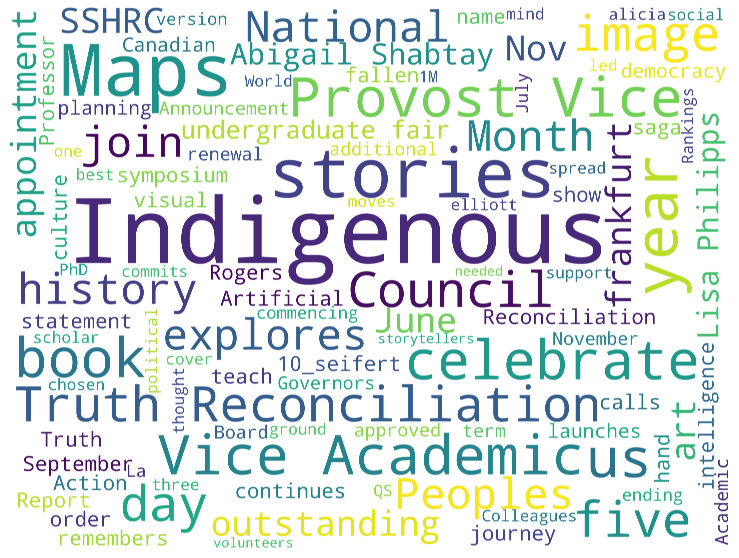

In [39]:
wordcloud = WordCloud(
    width=2000,
    height=1500,
    scale=10,
    max_font_size=250,
    max_words=100,
    background_color="white",
).generate(str(words))
plt.figure(figsize=[35, 10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [40]:
url_list = web_pages[['url', 'indigenous_count']].sort_values(by=['indigenous_count'], ascending=False)
url_list

,url,indigenous_count
31,https://yfile.news.yorku.ca/2021/10/03/national-day-for-truth-and-reconciliation-panel-focuses-on-reconciliation-in-action/,48
589,https://yfile.news.yorku.ca/2022/05/24/a-statement-on-yorks-commitment-to-the-indigenous-framework-and-decolonizing-research/,45
1037,https://yfile.news.yorku.ca/2022/06/17/reflecting-on-national-indigenous-peoples-day-and-national-indigenous-peoples-month/,44
221,https://yfile.news.yorku.ca/2021/05/06/coming-this-summer-new-resource-for-those-wanting-to-conduct-indigenous-research/,43
919,https://yfile.news.yorku.ca/2021/06/20/june-is-national-indigenous-history-month-and-june-21-is-national-indigenous-peoples-day/,41
...,...,...
1059,http://yfile.news.yorku.ca/2014/09/17/call-for-papers-2015-critical-approaches-to-south-asian-studies-workshop/,0
1194,http://yfile.news.yorku.ca/2009/11/05/national-union-takes-over-cupe-local-3903/,0
399,http://yfile.news.yorku.ca/2011/09/30/two-york-researchers-get-fulbright-awards/,0
935,https://yfile.news.yorku.ca/2022/08/10/patrick-alcedo-recognized-with-top-25-canadian-immigrant-award/,0


In [41]:
url_list.to_csv("yfile_indigenous_urls.csv", index=False)